# Linear Regeression


In [23]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('Football.csv')
pd.set_option('display.max_columns',None)


In [25]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1/2/2010,Qatar,Mali,0,0,Friendly
1,1/2/2010,Syria,Zimbabwe,6,0,Friendly
2,1/3/2010,Angola,Gambia,1,1,Friendly
3,1/4/2010,Egypt,Mali,1,0,Friendly
4,1/4/2010,Tanzania,Ivory Coast,0,1,Friendly


In [26]:
df.tail()

,date,home_team,away_team,home_score,away_score,tournament
8292,1/10/2024,Bahrain,Angola,0,3,Friendly
8293,1/10/2024,DR Congo,Burkina Faso,1,2,Friendly
8294,1/10/2024,Tunisia,Cape Verde,2,0,Friendly
8295,1/10/2024,South Africa,Lesotho,0,0,Friendly
8296,1/11/2024,Morocco,Sierra Leone,3,1,Friendly


In [27]:
df.shape

(8297, 6)

In [28]:
list(df.columns)

['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament']

In [29]:
df.select_dtypes(include=['float64','int64'])

,home_score,away_score
0,0,0
1,6,0
2,1,1
3,1,0
4,0,1
...,...,...
8292,0,3
8293,1,2
8294,2,0
8295,0,0


In [30]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object')

In [39]:
df['tournament'].value_counts() #This gives the unique value counts in the data set 

Friendly                                      4038
FIFA World Cup qualification                  2474
African Cup of Nations qualification           675
African Cup of Nations                         261
African Nations Championship                   252
FIFA World Cup                                 192
COSAFA Cup                                     157
CECAFA Cup                                     142
African Nations Championship qualification      64
Arab Cup                                        22
Nile Basin Tournament                           14
Arab Cup qualification                           6
Name: tournament, dtype: int64

In [40]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
dtype: int64

In [46]:
df.duplicated().sum()

11

In [47]:
df=df.drop_duplicates(keep='first')

In [49]:
# If there are any null values we need to drop them 
#for that the syntax is 
#df.dropna(inplace=True)

In [50]:
df.describe()

,home_score,away_score
count,8286.000000,8286.000000
mean,1.540430,1.020637
std,1.531009,1.218123
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,15.000000,16.000000


In [51]:
df.corr(method='pearson')

C:\Users\nvsri\AppData\Local\Temp\ipykernel_16340\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,home_score,away_score
home_score,1.000000,-0.158138
away_score,-0.158138,1.000000


In [52]:
df['home_team'].unique()

array(['Qatar', 'Syria', 'Angola', 'Egypt', 'Tanzania', 'Ghana', 'Benin',
       'Gabon', 'Rwanda', 'Kenya', 'Tunisia', 'Zambia', 'Ivory Coast',
       'Malawi', 'Mozambique', 'Cameroon', 'Mali', 'Yemen', 'Nigeria',
       'Finland', 'Burkina Faso', 'Chile', 'Oman', 'Latvia',
       'United States', 'Argentina', 'South Africa', 'Algeria', 'Jamaica',
       'Japan', 'Kuwait', 'Mexico', 'Jordan', 'Malaysia', 'Guadeloupe',
       'Republic of Ireland', 'Albania', 'Armenia', 'Austria', 'Belgium',
       'Bosnia and Herzegovina', 'Cyprus', 'El Salvador', 'England',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Italy',
       'Kazakhstan', 'Libya', 'Luxembourg', 'North Macedonia', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Scotland',
       'Slovakia', 'Slovenia', 'Switzerland', 'Turkey', 'Venezuela',
       'Wales', 'Zimbabwe', 'Niger', 'Iceland', 'Namibia', 'Martinique',
       'Paraguay', 'Saint Kitts and Nevis', 'Honduras', 'South Korea',
       'Cors

In [55]:
list(df.columns)

['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament']

In [58]:
df.select_dtypes(['number','datetime64'])

,home_score,away_score
0,0,0
1,6,0
2,1,1
3,1,0
4,0,1
...,...,...
8292,0,3
8293,1,2
8294,2,0
8295,0,0


In [59]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object')

In [60]:
df['date']=pd.to_datetime(df['date'])

In [61]:
df

,date,home_team,away_team,home_score,away_score,tournament
0,2010-01-02,Qatar,Mali,0,0,Friendly
1,2010-01-02,Syria,Zimbabwe,6,0,Friendly
2,2010-01-03,Angola,Gambia,1,1,Friendly
3,2010-01-04,Egypt,Mali,1,0,Friendly
4,2010-01-04,Tanzania,Ivory Coast,0,1,Friendly
...,...,...,...,...,...,...
8292,2024-01-10,Bahrain,Angola,0,3,Friendly
8293,2024-01-10,DR Congo,Burkina Faso,1,2,Friendly
8294,2024-01-10,Tunisia,Cape Verde,2,0,Friendly
8295,2024-01-10,South Africa,Lesotho,0,0,Friendly


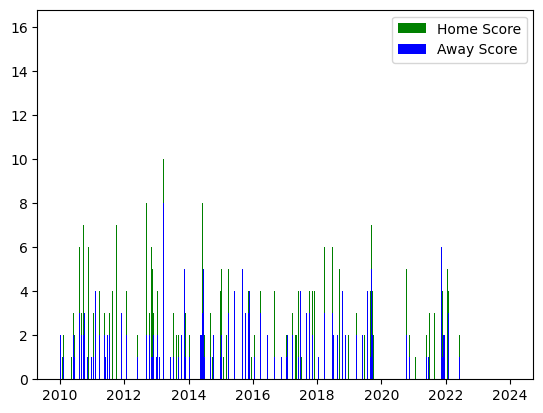

In [64]:
x=df['date']
y=df['home_score']
y1=df['away_score']
plt.bar(x,y,label='Home Score',color='green')
plt.bar(x,y1,label='Away Score',color='blue')
plt.xlabel='Date'
plt.ylabel='score'
plt.legend()
plt.show()

In [72]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object')

In [76]:
k=df['home_team'].value_counts()
k

South Africa    111
Mexico          100
Morocco          94
Egypt            93
Qatar            92
               ... 
Galicia           1
Madrid            1
Tuvalu            1
Artsakh           1
iran              1
Name: home_team, Length: 241, dtype: int64

In [78]:
df['home_team'].unique()

array(['Qatar', 'Syria', 'Angola', 'Egypt', 'Tanzania', 'Ghana', 'Benin',
       'Gabon', 'Rwanda', 'Kenya', 'Tunisia', 'Zambia', 'Ivory Coast',
       'Malawi', 'Mozambique', 'Cameroon', 'Mali', 'Yemen', 'Nigeria',
       'Finland', 'Burkina Faso', 'Chile', 'Oman', 'Latvia',
       'United States', 'Argentina', 'South Africa', 'Algeria', 'Jamaica',
       'Japan', 'Kuwait', 'Mexico', 'Jordan', 'Malaysia', 'Guadeloupe',
       'Republic of Ireland', 'Albania', 'Armenia', 'Austria', 'Belgium',
       'Bosnia and Herzegovina', 'Cyprus', 'El Salvador', 'England',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Italy',
       'Kazakhstan', 'Libya', 'Luxembourg', 'North Macedonia', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Scotland',
       'Slovakia', 'Slovenia', 'Switzerland', 'Turkey', 'Venezuela',
       'Wales', 'Zimbabwe', 'Niger', 'Iceland', 'Namibia', 'Martinique',
       'Paraguay', 'Saint Kitts and Nevis', 'Honduras', 'South Korea',
       'Cors

(array([537., 570., 406., 598., 375., 378., 364., 362., 342., 276., 329.,
        291., 333., 359., 404., 318., 219., 243., 290., 281., 138., 118.,
        153.,  97., 196.,  95., 120.,  57.,  27.,  10.]),
 array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
         88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168.,
        176., 184., 192., 200., 208., 216., 224., 232., 240.]),
 <BarContainer object of 30 artists>)

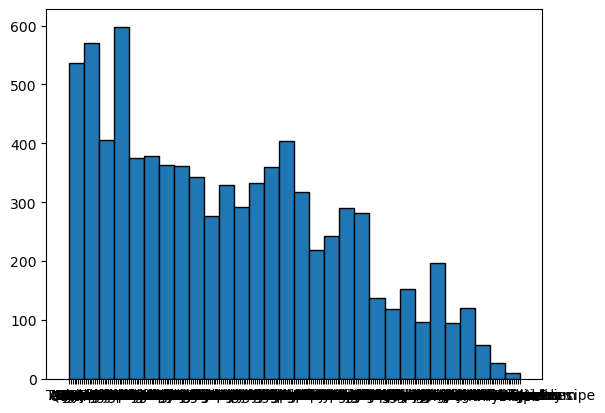

In [88]:
plt.hist(df['home_team'], bins=30, edgecolor='black')


In [89]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object')

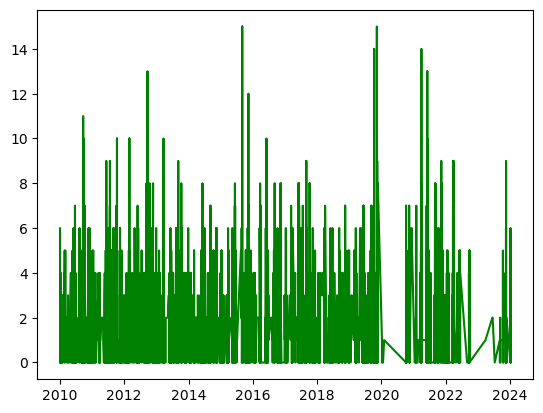

In [91]:
s=df['date']
k=df['home_score']
plt.plot(s,k,'green')

plt.show()

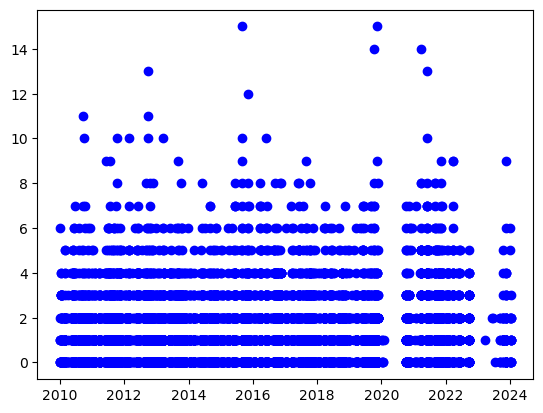

In [92]:
plt.scatter(s,k,color='blue')